## ☁️ Connect G-Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Homework 2 AN2DL condivisa

Mounted at /gdrive
/gdrive/My Drive/Homework 2 AN2DL condivisa


## ⚒️ Import libraries


In [2]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import os
import math
from PIL import Image
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot display settings
#sns.set(font_scale=1.4)
sns.set_style('white')
#plt.rc('font', size=14)
%matplotlib inline

2.17.1


## 📊 Load data

In [12]:
data = np.load("Datasets/mars_for_students.npz")
training_set = data["training_set"]

X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(training_set.shape)

(2615, 64, 128)
(2615, 64, 128)
(10022, 64, 128)
(2615, 2, 64, 128)


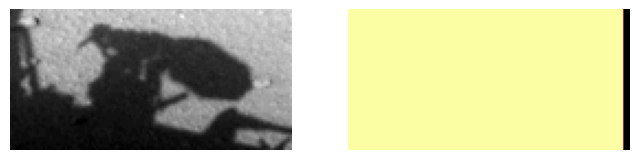

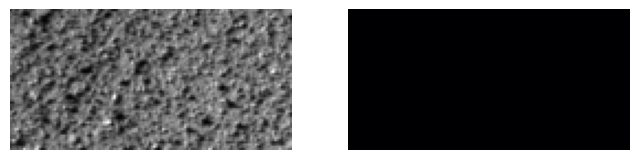

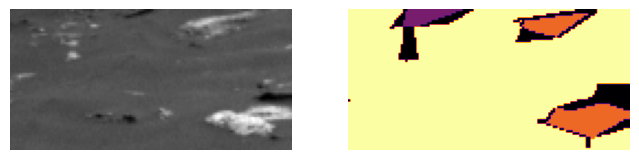

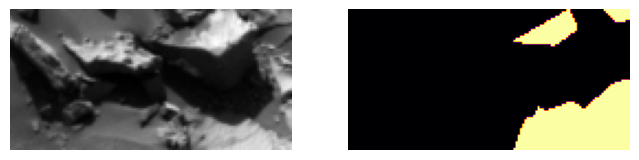

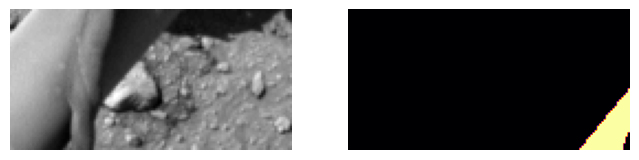

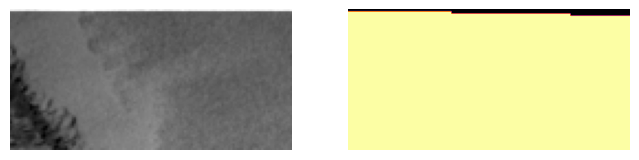

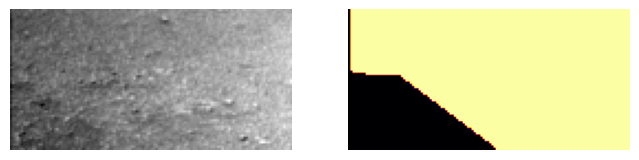

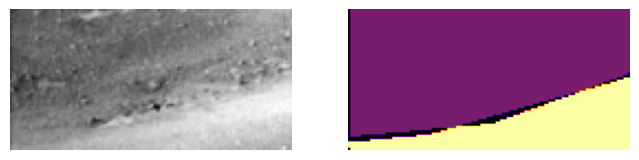

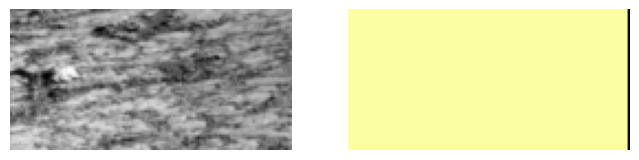

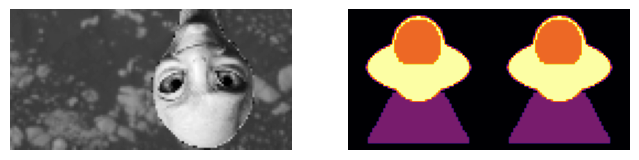

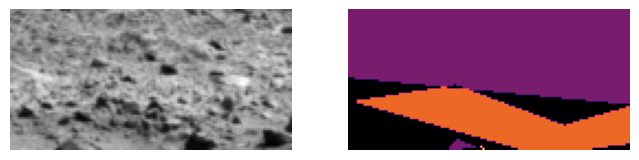

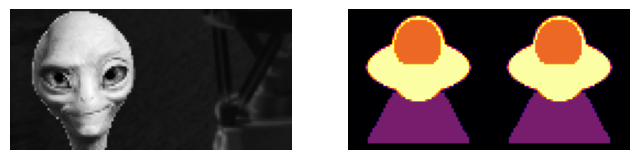

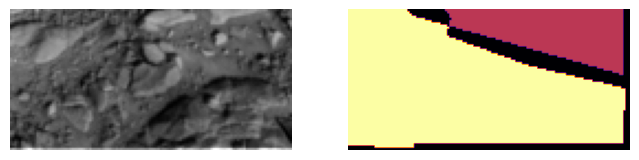

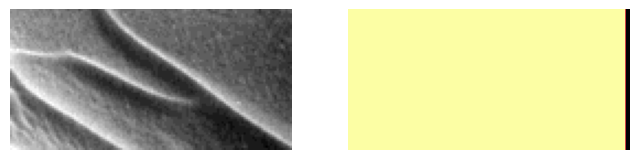

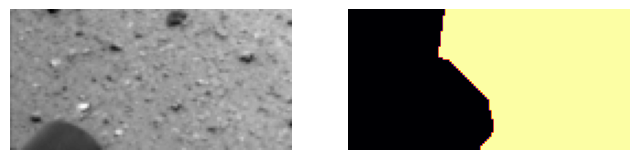

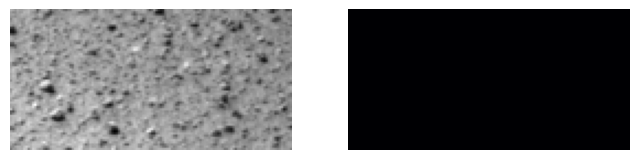

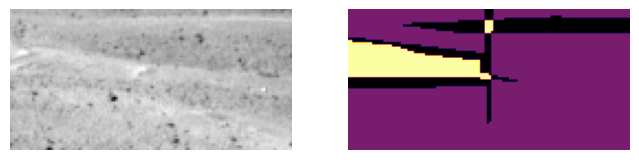

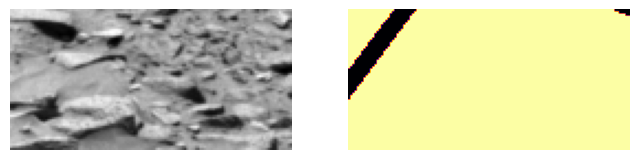

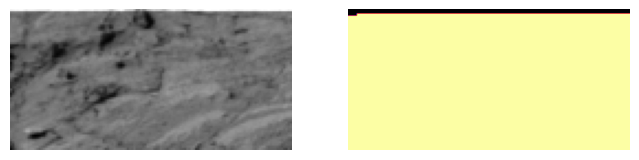

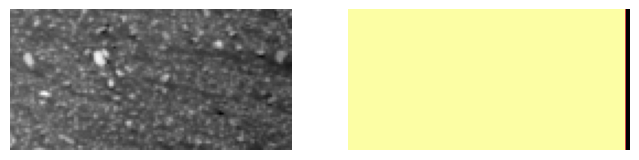

In [16]:
# Random images with the related segmentation map
idx = np.random.randint(0, X_train.shape[0],20)

for i in idx:
  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(y_train[i], cmap='inferno')
  plt.axis('off')
plt.show()


## Removing the aliens 👽❌

In [17]:
# label of the first alien image
label1 = y_train[62]

idx_aliens = []

# Getting the index of all the images looking at differences in the segmentation map
for i in range(X_train.shape[0]):
  label2 = y_train[i]
  if np.array_equal(label1, label2):
    idx_aliens.append(i)

new_idx = [x for x in range(X_train.shape[0]) if x not in idx_aliens]

# Removing alien images
X_train = X_train[new_idx]
y_train = y_train[new_idx]

print(X_train.shape)
print(y_train.shape)

# Save the new dataset
np.savez_compressed("Datasets/Datasets_cleaned.npz", training_set = [X_train, y_train], test_set = X_test)

(2505, 64, 128)
(2505, 64, 128)
